In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                            shear_range = 0.2,
                                                            zoom_range = 0.2,
                                                            horizontal_flip = True)

In [3]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [4]:
training_set = train_datagen.flow_from_directory('datasets/fruit/Training/',
                                                target_size = (100,100),
                                                batch_size = 32,
                                                class_mode = 'categorical',
                                                shuffle = True)

Found 1571 images belonging to 5 classes.


In [5]:
test_set = test_datagen.flow_from_directory('datasets/fruit/Test/',
                                           target_size = (100,100),
                                           batch_size = 32,
                                           class_mode = 'categorical',
                                           shuffle = False)

Found 784 images belonging to 5 classes.


In [6]:
classifier = tf.keras.models.Sequential()

In [7]:
#1. Convolution layer
classifier.add(tf.keras.layers.Conv2D(16,(2,2),input_shape=(100,100,3),activation='relu'))

#2. Pooling layer
classifier.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

#3. Second convolution layer
classifier.add(tf.keras.layers.Conv2D(32,(2,2),activation='relu'))

#4. Second pooling layer
classifier.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

#5. Add third and fourth convolution layers
classifier.add(tf.keras.layers.Conv2D(64,(2,2),activation='relu'))
classifier.add(tf.keras.layers.Conv2D(64,(2,2),activation='relu'))

#6. Third pooling layer
classifier.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

#7. Dropout layer
classifier.add(tf.keras.layers.Dropout(0.3))

#8. Flattening layer
classifier.add(tf.keras.layers.Flatten())

#9. Full connection
classifier.add(tf.keras.layers.Dense(units = 12, activation = 'relu'))

#10. Second dropout layer
classifier.add(tf.keras.layers.Dropout(0.4))

#11. Ouput layer
classifier.add(tf.keras.layers.Dense(units = 5, activation = 'softmax'))

In [8]:
classifier.compile(optimizer = 'rmsprop',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

In [9]:
cnn = classifier.fit_generator(generator = training_set,
                              steps_per_epoch = 32,
                              epochs = 30,
                              validation_data = test_set,
                              validation_steps = 10)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
32/32 [==============================] - 9s 271ms/step - loss: 1.4821 - accuracy: 0.3126 - val_loss: 1.6141 - val_accuracy: 0.0188
Epoch 2/30
32/32 [==============================] - 11s 348ms/step - loss: 1.3187 - accuracy: 0.4170 - val_loss: 1.4964 - val_accuracy: 0.0531
Epoch 3/30
32/32 [==============================] - 11s 346ms/step - loss: 1.2059 - accuracy: 0.4492 - val_loss: 1.1873 - val_accuracy: 0.4000
Epoch 4/30
32/32 [==============================] - 9s 267ms/step - loss: 1.1212 - accuracy: 0.4633 - val_loss: 1.1956 - val_accuracy: 0.5500
Epoch 5/30
32/32 [==============================] - 8s 249ms/step - loss: 1.0745 - accuracy: 0.5059 - val_loss: 0.8561 - val_accuracy: 0.9656
Epoch 6/30
32/32 [==============================] - 8s 238ms/step - loss: 0.9914 - accuracy: 0.5459 - val_loss: 0.6035 - val_accuracy: 1.0000
Epoch 7/30
32/32 [==============================] - 9s 267ms/step - lo

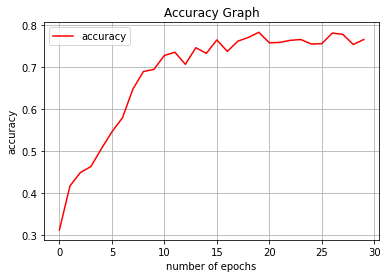

In [10]:
plt.plot(cnn.history['accuracy'],color="r",label="accuracy")
plt.title('Accuracy Graph')
plt.xlabel('number of epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

In [11]:
test_labels = test_set.labels

In [12]:
predictions = classifier.predict(test_set)

In [14]:
import numpy as np
predict_labels = np.argmax(predictions, axis=-1)

In [16]:
from sklearn.metrics import confusion_matrix
np.set_printoptions(threshold = np.inf)

print("Confusion Matrix: \n", confusion_matrix(test_labels,predict_labels))

Confusion Matrix: 
 [[154   0   0   0   0]
 [  0 160   0   0   0]
 [  0   0 154   0   0]
 [  0   0   0 154   0]
 [  0   0   0   0 162]]


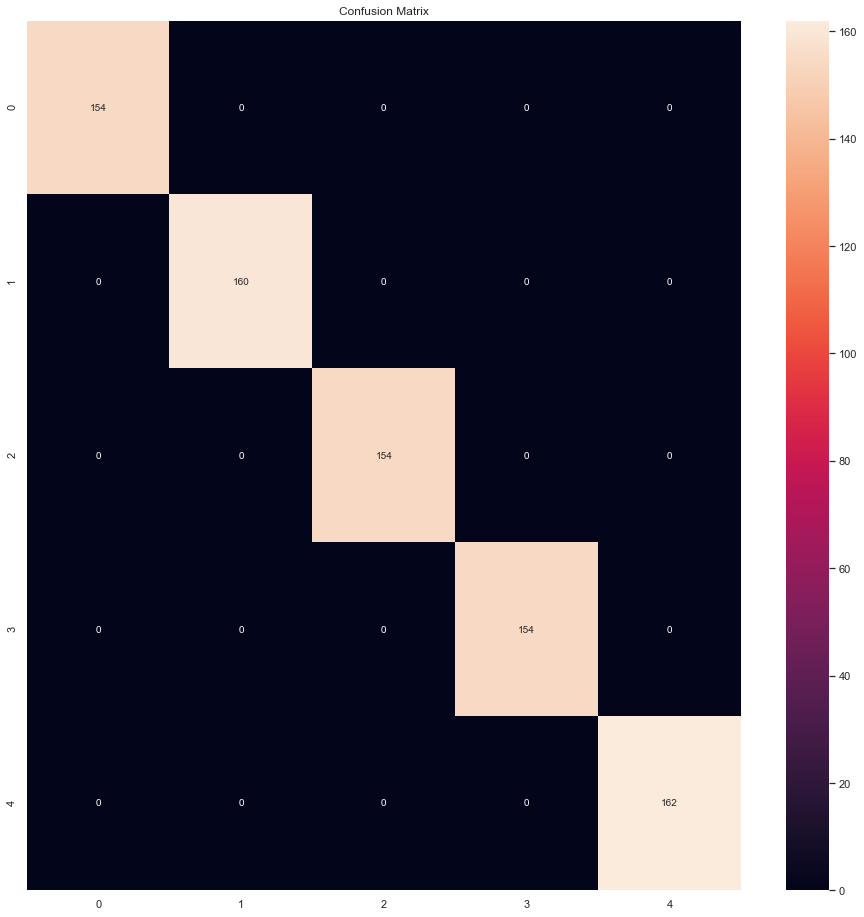

In [18]:
import seaborn as sns

sns.set(font_scale = 1.0)
plt.figure(figsize = (16,16))

CM = confusion_matrix(test_labels,predict_labels)
ax = plt.axes()

sns.heatmap(CM, annot = True,
           annot_kws={'size':10},
           fmt='d',
           xticklabels=range(0,5),
           yticklabels=range(0,5),
           ax=ax)
ax.set_title('Confusion Matrix')

plt.show()